# Iris project is a small data science project with dataset having only 150 records

## This data science project is performed with two stages:
 1. kNN classification without the use of scikit-learn library
 2. kNN classification with the use of scikit-learn library and taking accuracy score of the ML model.

## Stage 1: 
## Iris dataset comes pre-processed, so we will perform EDA and then jump right into writing the algorithm.

### Step 1: Importing the libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print("Importing libraries: COMPLETED")

Importing libraries: COMPLETED


### Step 2: Read the file and perform EDA

In [3]:
iris = pd.read_csv('Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,class
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.shape

(150, 6)

In [7]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'class'],
      dtype='object')

In [14]:
iris_report = pp.ProfileReport(iris)
iris_report.to_file(output_file="iris_report.html")

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

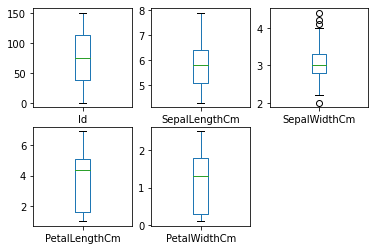

In [40]:
iris.plot(kind='box', subplots=True,layout=(2,3), sharex=False, sharey=False)
plt.show()

### Step 3: Write the function that performs the kNN algorithm and check by calling the function.

In [18]:
labels = iris['class']
groups = iris.iloc[:, 1:5]

def classifier1(inX2, groups, labels, k):
    irisDataSize = groups.shape[0]
    #print('Number of rows: ', irisDataSize)
    
    irisDiffMat = np.tile(inX2, (irisDataSize, 1)) - groups
    #print('New Dataset: ', irisDiffMat)
    
    irisSqDiffMat = irisDiffMat**2
    #print('Square of each element', irisSqDiffMat)
    
    irisSqDist = irisSqDiffMat.sum(axis=1)
    #print('Sum of all the elements of row: ', irisSqDist)
    
    irisDistances = irisSqDist**0.5
    #print('squareroot of each element: ', irisDistances)
    
    irisSortedDistIndices = irisDistances.argsort()
    #print('argsort (mergesort algo): ', irisSortedDistIndices)
    
    classCount = {}
    for i in range(k):
        voteIlabel = labels[irisSortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0)+ 1
    
    sortedClassCount = sorted(classCount.items(), reverse=True)
    return sortedClassCount[0][0]

print(classifier1([4.9, 3.0, 1.4, 0.2], groups, labels, k=3))
print(classifier1([5.6,2.9,3.6,1.3], groups, labels, k=4))
print(classifier1([7.7,2.8,6.7,2.0], groups, labels, k=3))

Iris-setosa
Iris-versicolor
Iris-virginica


## Stage 2: 
## Creating ML model using kNN algorithm with the use of scikit-learn

## Step 1: Import libraries

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Step 2: Prepare train test split and run the model and check accuracy score

In [44]:
labels = iris['class']
groups = iris.iloc[:, 1:5]
X_train, X_val, y_train, y_val = train_test_split(groups,labels , test_size=0.3, random_state=21, stratify=labels)

In [45]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

acc_knn = round(accuracy_score(y_pred, y_val)*100, 2)

acc_knn

97.78